In [ ]:
#step 1: Define the objective ofthe problem statement
# create classification model which can classify the flower
# species based on the input provided SL,SW,PL,PW
# step 2 : Data gathering 




In [ ]:
#import lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#read data set
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Step 3: data preperation
# Not reqd in this project

# step 4 : Exploratory Data Analysis

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#no null value

In [ ]:
data=df.drop_duplicates(subset='species')

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [ ]:
# 3 species is in data set


In [ ]:
df.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [ ]:
# each species has 50 value
# equal ammount of row for each species

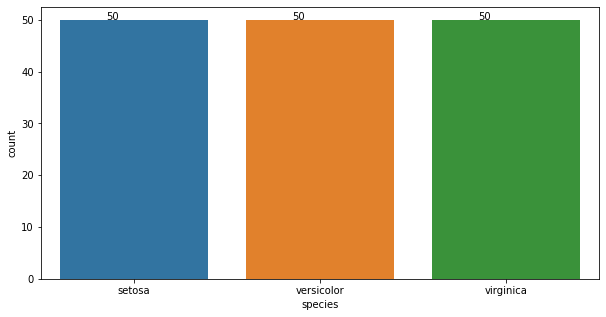

In [ ]:
plt.figure(figsize=(10,5))
a=sns.countplot(x='species',data=df)
for p in a.patches:
    a.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))

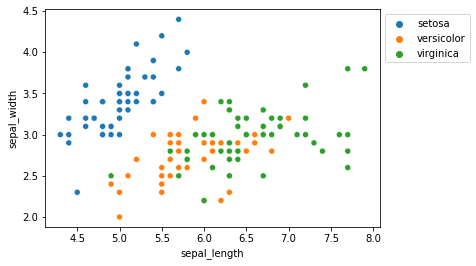

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
# setosa has small sepal length but large sepal width
# versicolor has sepal length and sepal width inbetween setosa and virginica
# virginica has largest sepal length but small sepal width


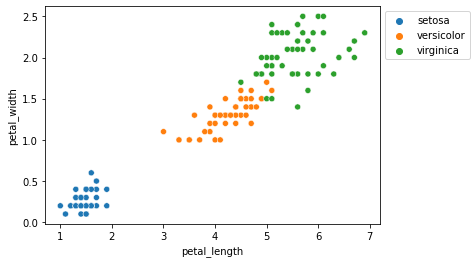

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=df)
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [ ]:
# setosa has smallest petal length and width
# versicolor has lies inbetween setosa and virginica for petal lenght and width
# virginica has largest petal length and width

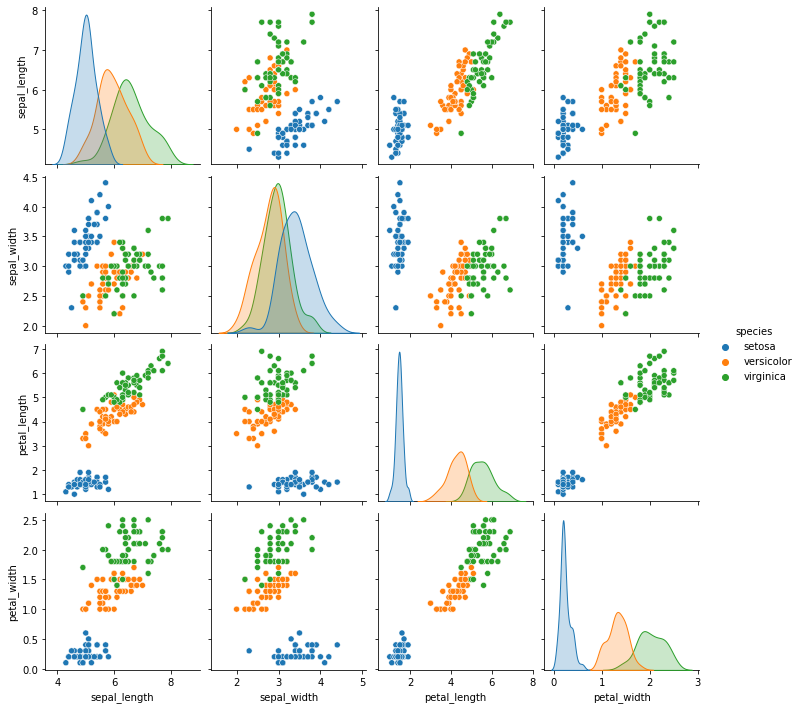

In [ ]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

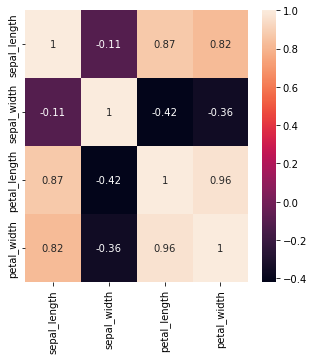

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

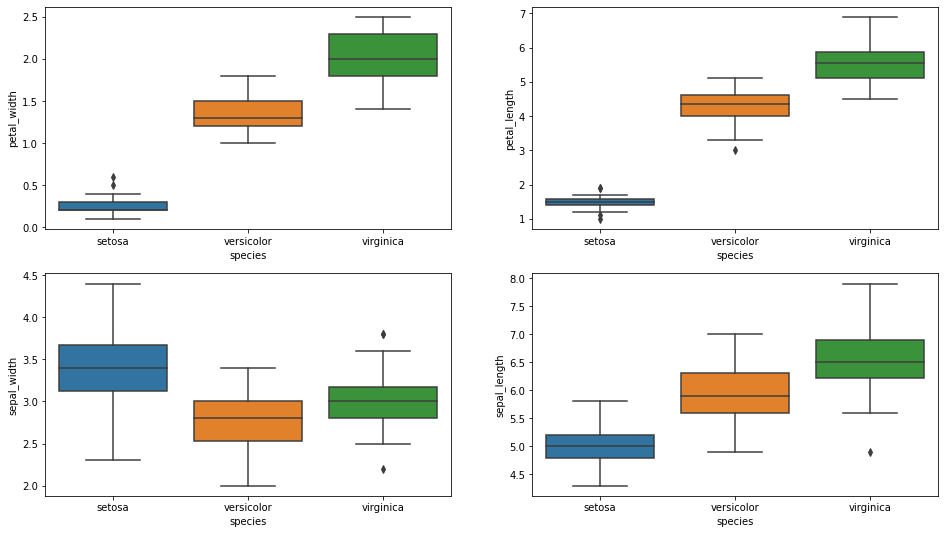

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(x="species", y="petal_width", data=df, orient="v", ax=axes[0,0])
sns.boxplot(x="species", y="petal_length", data=df, orient="v", ax=axes[0,1])
sns.boxplot(x="species", y="sepal_width", data=df, orient="v", ax=axes[1,0])
sns.boxplot(x="species", y="sepal_length", data=df, orient="v", ax=axes[1,1])
plt.show()

In [ ]:
#split data into x and y
# x=SL,SW,PL,PW
# y=species

In [ ]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
# split data into traning and testing
# train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (105, 4)
X_test:- (45, 4)
y_train:- (105,)
y_test:- (45,)


# Step 5:Building a machine learning model

In [ ]:
# create a model NB
from sklearn.naive_bayes import GaussianNB
ML_model=GaussianNB()
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")



model created
model traning completed
y_pred completed


## step 6: Model Evaluation & Optimization finding Kvalue in KNN

In [ ]:
from sklearn.metrics import classification_report
lab=['setosa', 'versicolor', 'virginica']
print(classification_report(y_test,y_pred,target_names=lab))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45




# Prediction 

In [ ]:
# SL=float(input("Enter SL:- "))
# SW=float(input("Enter SW:- "))
# PL=float(input("Enter PL:- "))
# PW=float(input("Enter PW:- "))

In [ ]:
# pred=ML_model.predict([[SL,SW,PL,PW]])[0]
# print("for SL={},SW={},PL={},PW={} flower species is {}".format(SL,SW,PL,PW,pred))

# save the Model

In [ ]:
# import joblib
# joblib.dump(ML_model,"KNN_Iris_Model.pkl")
# print("saved")

# Model Eval Parameter

In [ ]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    plt.figure(figsize=(10,5))

    sns.heatmap(cm,annot=True,cmap="YlGnBu")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")



Accuracy :- 0.9777777777777777
Error rate :- 0.022222222222222254
Precision:- 0.9792592592592592
Recall:-  0.9777777777777777
F1 score :-  0.9777493969064851
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]


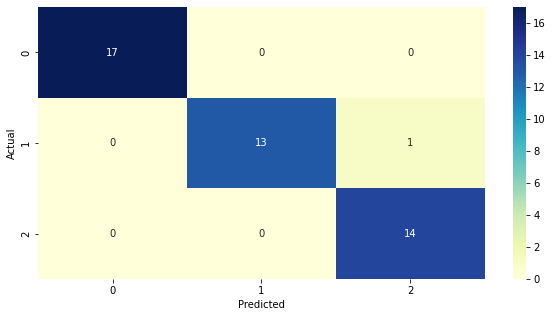

In [ ]:
model_Eval(y_test,y_pred)

# SVM

In [ ]:
# create Model for SVM (liner)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#model creation
ML_Model=SVC(kernel="linear")
print("Model created")

# model training
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("Accuracy:- ",acc*100)

Model created
Model traning completed
y_pred completed
Accuracy:-  97.77777777777777


In [ ]:
# created Model for svm (poly)

#model creation
ML_Model=SVC(kernel="poly")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
#accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy :- ",acc*100)

model created
model traning completd
y_pred find
accuracy :-  95.55555555555556


In [ ]:
# created Model for svm (rbf)

#model creation
ML_Model=SVC(kernel="rbf")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
#accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy :- ",acc*100)

model created
model traning completd
y_pred find
accuracy :-  97.77777777777777


# Decision Tree

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  97.77777777777777
Accuracy :- 0.9777777777777777
Error rate :- 0.022222222222222254
Precision:- 0.9792592592592592
Recall:-  0.9777777777777777
F1 score :-  0.9777493969064851
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]


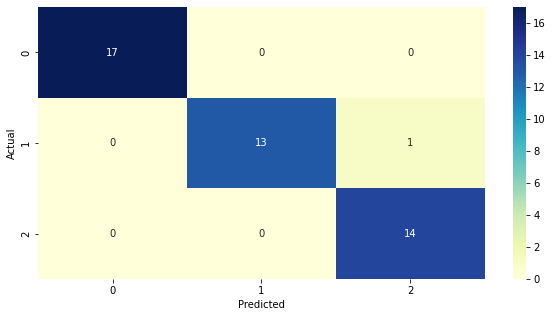

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# model creation
ML_Model=DecisionTreeClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [33, 36, 36]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.25, 'X[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]

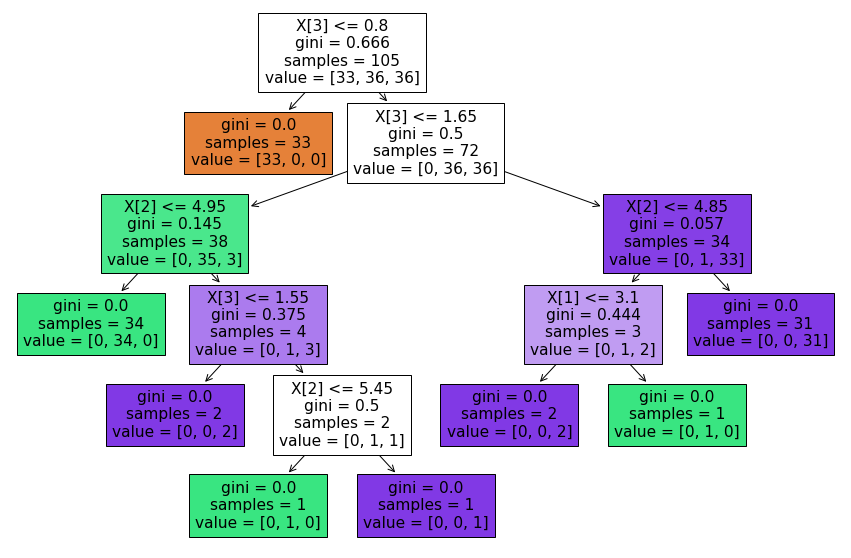

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(ML_Model,filled=True)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  95.55555555555556
Accuracy :- 0.9555555555555556
Error rate :- 0.0444444444444444
Precision:- 0.9555555555555556
Recall:-  0.9555555555555556
F1 score :-  0.9555555555555556
[[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]


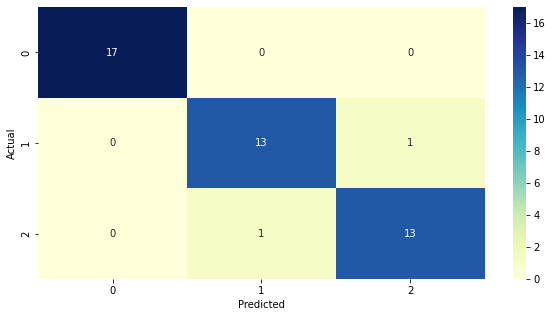

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# model creation
ML_Model=RandomForestClassifier(max_depth=2)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  93.33333333333333
Accuracy :- 0.9333333333333333
Error rate :- 0.06666666666666665
Precision:- 0.9345868945868947
Recall:-  0.9333333333333333
F1 score :-  0.9332481907194552
[[17  0  0]
 [ 0 13  1]
 [ 0  2 12]]


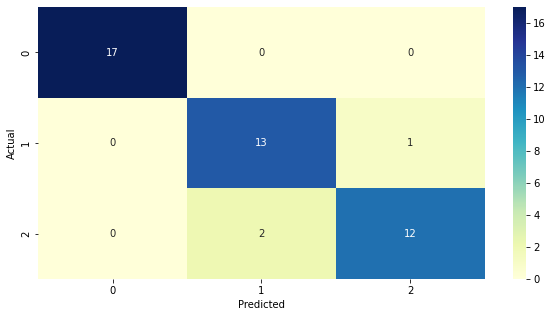

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# model creation
ML_Model=AdaBoostClassifier(n_estimators=100, random_state=0)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)